C:\Users\ezanlorense\Anaconda3\lib\site-packages\pygad\pygad.py:632: UserWarning: Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.
  if not self.suppress_warnings: warnings.warn("Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.")


Generation = 1
Fitness    = 30025.077112682542
Generation = 2
Fitness    = 30028.234758310464
Generation = 3
Fitness    = 30044.65367741735
Generation = 4
Fitness    = 30044.65367741735
Generation = 5
Fitness    = 30058.208124579287
Generation = 6
Fitness    = 30102.814634850816
Generation = 7
Fitness    = 30102.814634850816
Generation = 8
Fitness    = 30103.203153432623
Generation = 9
Fitness    = 30103.795885467174
Generation = 10
Fitness    = 30104.274295387164
Generation = 11
Fitness    = 30107.23662885491
Generation = 12
Fitness    = 30107.23662885491
Generation = 13
Fitness    = 30107.23662885491
Generation = 14
Fitness    = 30108.95971974102
Generation = 15
Fitness    = 30110.47560678114
Generation = 16
Fitness    = 30111.10653900241
Generation = 17
Fitness    = 30113.202832191615
Generation = 18
Fitness    = 30113.202832191615
Generation = 19
Fitness    = 30113.425901080343
Generation = 20
Fitness    = 30114.472356129947
Generation = 21
Fitness    = 30115.708126578458
Generatio

Generation = 172
Fitness    = 30260.237555827844
Generation = 173
Fitness    = 30260.359319847303
Generation = 174
Fitness    = 30260.359319847303
Generation = 175
Fitness    = 30263.151204196707
Generation = 176
Fitness    = 30263.151204196707
Generation = 177
Fitness    = 30265.30424817404
Generation = 178
Fitness    = 30265.72409268746
Generation = 179
Fitness    = 30265.999039322814
Generation = 180
Fitness    = 30268.13711786516
Generation = 181
Fitness    = 30269.01231008635
Generation = 182
Fitness    = 30272.784114067887
Generation = 183
Fitness    = 30272.784114067887
Generation = 184
Fitness    = 30274.38796415549
Generation = 185
Fitness    = 30274.38796415549
Generation = 186
Fitness    = 30274.892543782516
Generation = 187
Fitness    = 30277.408931014004
Generation = 188
Fitness    = 30278.134668703657
Generation = 189
Fitness    = 30281.63478017906
Generation = 190
Fitness    = 30281.63478017906
Generation = 191
Fitness    = 30281.691599289625
Generation = 192
Fitness    

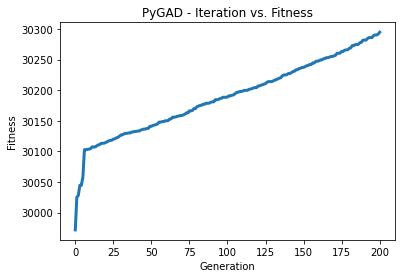

Fitness value of the best solution = 30294.559261933922
Index of the best solution : 10
Best fitness value reached after 200 generations.


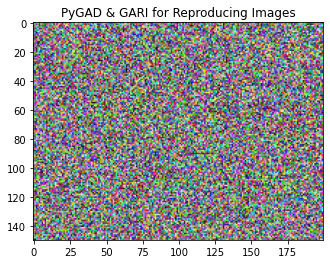

In [1]:
import numpy
import imageio
import gari
import pygad
import matplotlib.pyplot

"""
GARI (Genetic Algorithm for Reproducing Images) is a Python project that uses the PyGAD library for reproducing images using the genetic algorithm. GARI reproduces a single image using Genetic Algorithm (GA) by evolving pixel values.

For implementing the genetic algorithm, the PyGAD library is used. Check its documentation here: https://pygad.readthedocs.io

This project works with both color and gray images without any modifications.

This project is implemented using Python 3.5 by Ahmed Fawzy Gad.
Contact info:
ahmed.f.gad@gmail.com
https://www.linkedin.com/in/ahmedfgad/
"""

# Reading target image to be reproduced using Genetic Algorithm (GA).
target_im = imageio.imread('fruit.jpg')
target_im = numpy.asarray(target_im/255, dtype=numpy.float)

# Target image after enconding. Value encoding is used.
target_chromosome = gari.img2chromosome(target_im)
mutation_type='random'
crossover_type="single_point"
parent_selection_type="sss"
mutation_percent_genes=0.01
num_generations=2000
def fitness_fun(solution, solution_idx):
    """
    Calculating the fitness value for a solution in the population.
    The fitness value is calculated using the sum of absolute difference between genes values in the original and reproduced chromosomes.
    
    solution: Current solution in the population to calculate its fitness.
    solution_idx: Index of the solution within the population.
    """

    fitness = numpy.sum(numpy.abs(target_chromosome-solution))

    # Negating the fitness value to make it increasing rather than decreasing.
    fitness = numpy.sum(target_chromosome) - fitness
    return fitness

def callback(ga_instance):
    print("Generation = {gen}".format(gen=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

    if ga_instance.generations_completed % 500 == 0:
        matplotlib.pyplot.imsave('solution_'+str(ga_instance.generations_completed)+'.png', gari.chromosome2img(ga_instance.best_solution()[0], target_im.shape))

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=10,
                       fitness_func=fitness_fun,
                       sol_per_pop=20,
                       num_genes=target_im.size,
                       init_range_low=0.0,
                       init_range_high=1.0,
                       mutation_percent_genes=mutation_percent_genes,
                       mutation_type=mutation_type,
                       mutation_by_replacement=True,
                       random_mutation_min_val=0.0,
                       random_mutation_max_val=1.0,
                       callback_generation=callback,
                      crossover_type=crossover_type,
                      parent_selection_type=parent_selection_type)

ga_instance.run()

# After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.
ga_instance.plot_result()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

result = gari.chromosome2img(solution, target_im.shape)
matplotlib.pyplot.imshow(result)
matplotlib.pyplot.title("PyGAD & GARI for Reproducing Images")
matplotlib.pyplot.show()